## Objective of analysis

The objective of analysis is to understand the global trends of investments in different sectors made in English speaking countries, which fall between the cap of 5,000,000 and 15,000,000 USD. 

Import Required libraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Checkpoint 1: Data Cleaning 

Read and load companies and rounds2 dataframes

In [92]:
companies = pd.read_csv("data/companies.csv")
companies.head(10)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
5,/Organization/01Games-Technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
6,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
7,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
8,/Organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
9,/Organization/1-2-3-Listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,operating,CHL,12,Santiago,Las Condes,01-01-2012


In [93]:
rounds2 = pd.read_csv("rounds2.csv")
rounds2.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
9,/ORGANIZATION/0XDATA,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0


In [94]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [95]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


From the two dataframes it is clear that *permalink* and *company_permalink* should be used as unique columns for merge

Table 1.1.1 solution is as follows:

In [96]:
len(rounds2['company_permalink'].unique())

90247

Table 1.1.2 solution is as follows:

In [97]:
len(companies['permalink'].unique())

66368

Table 1.1.3 solution is as follows:
In companies dataframe the *permalink* column can be used as unique key, as it stands for Unique ID of a company

For merging companies and rounds2 dataframes we need to format the two unique keys into the same string format, we choose to convert the values to upper case alphabets

In [98]:
companies['permalink'] = companies['permalink'].apply(lambda x: x.upper())
rounds2['company_permalink'] = rounds2['company_permalink'].apply(lambda x: x.upper())

In [99]:
# Check no. of ID's present in rounds2 but not in companies
len(rounds2[rounds2['company_permalink'].isin(companies['permalink']) == False])

40

Table 1.1.4 solution is as follows:

In [100]:
"Yes" if len(rounds2[rounds2['company_permalink'].isin(companies['permalink']) == False]) > 0 else "No"

'Yes'

In [101]:
# Check no. of ID's present in companies but not in rounds2
len(companies[companies['permalink'].isin(rounds2['company_permalink']) == False])

34

To carry out the merge we will merge with only the intersection values of the two dataframes

In [102]:
rounds2_tmp = rounds2.rename(columns={'company_permalink':'permalink'})

In [103]:
master_frame = pd.merge(rounds2_tmp,companies,on='permalink')
master_frame.shape

(114909, 15)

Table 1.1.5 solution is as follows:

In [104]:
len(master_frame)

114909

### Checkpoint 2: Funding Type Analysis 

We are interested only in the following Investment types: Venture, Seed, angel and private equity. We trim the dataframe to include only these investment types.

In [105]:
master_frame= master_frame[master_frame['funding_round_type'].isin(['venture','angel','seed','private_equity'])]
master_frame.head(10)

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
9,/ORGANIZATION/0XDATA,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
10,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


We find rows with the raised_amount_usd as NA, we will remove these entries as it would be inaccurate to guess these values

In [106]:
len(master_frame[master_frame['raised_amount_usd'].isna()])

13755

In [107]:
# remove all rows with NA in raised_amount_usd attribute
master_frame= master_frame[~(master_frame['raised_amount_usd'].isna())]
len(master_frame)

80613

We plot a boxplot of the ivestment types to understand the distribution of data

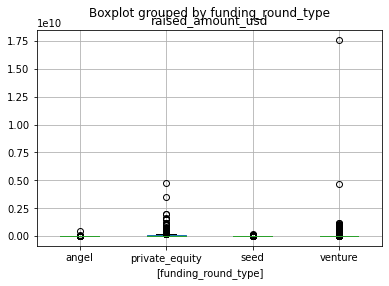

In [108]:
master_frame.boxplot(by='funding_round_type')
plt.show()

From the plot it is clear that there exists outlier values, hence choosing the median as a representative value for raised amount would be most appropriate

In [109]:
master_frame['raised_amount_usd'].describe()

count    8.061300e+04
mean     9.349070e+06
std      7.563584e+07
min      0.000000e+00
25%      4.000000e+05
50%      2.000000e+06
75%      7.983033e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

We can also see that there are companies who haven't raised any amount (0), we can remove these entries too as 0 amount invested is equivalent to not being invested

In [110]:
master_frame = master_frame[~(master_frame['raised_amount_usd'] == 0)]
master_frame['raised_amount_usd'].describe()

count    8.045600e+04
mean     9.367314e+06
std      7.570848e+07
min      1.000000e+00
25%      4.095262e+05
50%      2.000000e+06
75%      8.000000e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

We analyse the raised amount data for each investment type

In [111]:
master_frame[master_frame['funding_round_type']=='venture']['raised_amount_usd'].describe()

count    5.019700e+04
mean     1.175549e+07
std      8.637821e+07
min      1.000000e+00
25%      1.610000e+06
50%      5.000000e+06
75%      1.200000e+07
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

In [112]:
master_frame[master_frame['funding_round_type']=='angel']['raised_amount_usd'].describe()

count    4.829000e+03
mean     9.648489e+05
std      7.427731e+06
min      1.200000e+01
25%      1.500000e+05
50%      4.000000e+05
75%      1.000000e+06
max      4.945120e+08
Name: raised_amount_usd, dtype: float64

In [113]:
master_frame[master_frame['funding_round_type']=='seed']['raised_amount_usd'].describe()

count    2.349700e+04
mean     7.227140e+05
std      2.226088e+06
min      1.000000e+00
25%      5.914500e+04
50%      2.800000e+05
75%      1.000000e+06
max      2.000000e+08
Name: raised_amount_usd, dtype: float64

In [114]:
master_frame[master_frame['funding_round_type']=='private_equity']['raised_amount_usd'].describe()

count    1.933000e+03
mean     7.342237e+07
std      1.982461e+08
min      6.000000e+00
25%      5.000000e+06
50%      2.000000e+07
75%      7.500000e+07
max      4.745460e+09
Name: raised_amount_usd, dtype: float64

In [115]:
investment_type = master_frame.pivot_table(index='funding_round_type', values='raised_amount_usd', aggfunc=np.median)
investment_type

,raised_amount_usd
funding_round_type,
angel,400000.0
private_equity,20000000.0
seed,280000.0
venture,5000000.0


The solution for Table 2.1.1-4 are taken from the median values mentioned above

From the Above representative values, it is clear that Venture type is the most suitable ivestment type as it falls between 5,000,000 and 15,000,000 USD.

In [116]:
master_frame_2 = master_frame[master_frame['funding_round_type']=='venture']

### Checkpoint 3: Country Analysis 

For country analysis, we will first remove any NA fields in the *country_code* to clean the data 

In [117]:
len(master_frame_2[master_frame_2['country_code'].isna()])

2114

In [118]:
master_frame_2 = master_frame_2[~(master_frame_2['country_code'].isna())]

Following are the top 9 countries based on amount invested

In [119]:
# The top 9 countries are sorted in descending order
top9 = master_frame_2.pivot_table(index='country_code',values='raised_amount_usd',aggfunc=np.sum).sort_values(by='raised_amount_usd',ascending=False)[:9]
top9

,raised_amount_usd
country_code,
USA,4.225108e+11
CHN,3.983542e+10
GBR,2.024563e+10
IND,1.439186e+10
CAN,9.583332e+09
FRA,7.259537e+09
ISR,6.907515e+09
DEU,6.346960e+09
JPN,3.363677e+09


From the top 9 countries we are interested only in top3 English speaking countries, hence we add an attribute to understand which countries are English speaking

In [120]:
top9_plot = top9
top9_plot['english_speaking'] = top9.index.isin(['GBR','USA','IND','CAN','ISR'])

The top 3 english speaking countries are as follows:

In [121]:
top9_plot[top9_plot['english_speaking']][:3]

,raised_amount_usd,english_speaking
country_code,,
USA,4.225108e+11,True
GBR,2.024563e+10,True
IND,1.439186e+10,True


In [122]:
master_frame_3 = master_frame_2[master_frame_2['country_code'].isin(['USA','GBR','IND'])]

### Checkpoint 4: Sector Analysis 1  

We need to map the mapping dataframe to the masterframe, but first we need to analyse the fields to be mapped

In [123]:
mapping = pd.read_csv('mapping.csv')
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [124]:
mapping.columns

Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [125]:
master_frame_3['category_list'].value_counts()

Biotechnology                                                                        4633
Software                                                                             3236
Health Care                                                                          1221
Clean Technology                                                                     1040
Enterprise Software                                                                  1011
                                                                                     ... 
Design|Service Providers                                                                1
Intellectual Asset Management|Intellectual Property|Licensing                           1
Concerts|Consumer Internet|Digital Media|Media|Video Streaming                          1
iPhone|News                                                                             1
College Recruiting|Enterprise Software|Recruiting|SaaS|Social Recruiting|Software       1
Name: cate

We can see that some categories have '|' symbol in between, hence we create a new attribute to save only the primary category which will be the first occuring category for each row in the *category_list* attribute

In [126]:
master_frame_3['primary_sector'] = master_frame_3['category_list'].apply(lambda x: str(x).split('|')[0])
master_frame_3

<ipython-input-126-aaa42e7f1495>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_frame_3['primary_sector'] = master_frame_3['category_list'].apply(lambda x: str(x).split('|')[0])


,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
10,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
11,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
12,/ORGANIZATION/0XDATA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
22,/ORGANIZATION/1-MAINSTREAM,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,Apps
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114882,/ORGANIZATION/ZYOMYX-INC,/funding-round/4191cb5258d3863b0212d1083881da64,venture,B,30-06-2013,12000000.0,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,Biotechnology
114884,/ORGANIZATION/ZYOMYX-INC,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.0,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,Biotechnology
114885,/ORGANIZATION/ZYOMYX-INC,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,29-01-2010,555016.0,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,Biotechnology
114896,/ORGANIZATION/ZYRRA,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,E-Commerce


In [127]:
# Correct the index
master_frame_3.reset_index()

,index,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
1,10,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
2,11,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
3,12,/ORGANIZATION/0XDATA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
4,22,/ORGANIZATION/1-MAINSTREAM,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,Apps
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38991,114882,/ORGANIZATION/ZYOMYX-INC,/funding-round/4191cb5258d3863b0212d1083881da64,venture,B,30-06-2013,12000000.0,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,Biotechnology
38992,114884,/ORGANIZATION/ZYOMYX-INC,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.0,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,Biotechnology
38993,114885,/ORGANIZATION/ZYOMYX-INC,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,29-01-2010,555016.0,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,Biotechnology
38994,114896,/ORGANIZATION/ZYRRA,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,E-Commerce


Create a new attribute in mapping dataframe to easily understand the sector type

In [128]:
def map_sect(x):
    for col in mapping.columns:
        if col == 'category_list':
            continue
        if mapping[col][x]:
            return col
result = map(map_sect, mapping.index)
mapping['main_sector'] = list(result)

On analysing the mapping dataframe in excel, we can see that there is an error in the *category_list* where 'na' is replaced with '0'.

In [129]:
mapping['category_list'] = mapping['category_list'].apply(lambda x: str(x).replace('0','Na') if str(x).find('0') == 0 else str(x).replace('0','na'))

This however created an error in the following example hence we need to make an exception for this value

In [130]:
# We can find 'Enterprise 2.na' which should actually be 'Enterprise 2.0'
mapping['category_list'].unique()

array(['nan', '3D', '3D Printing', '3D Technology', 'Accounting',
       'Active Lifestyle', 'Ad Targeting', 'Advanced Materials',
       'Adventure Travel', 'Advertising', 'Advertising Exchanges',
       'Advertising Networks', 'Advertising Platforms', 'Advice',
       'Aerospace', 'Agriculture', 'Air Pollution Control', 'Algorithms',
       'All Markets', 'All Students', 'Alternative Medicine', 'Alumni',
       'Analytics', 'Android', 'Angels', 'Animal Feed',
       'Anything Capital Intensive', 'App Discovery', 'App Marketing',
       'App Stores', 'Application Performance Monitoring',
       'Application Platforms', 'Apps', 'Aquaculture', 'Architecture',
       'Archiving', 'Art', 'Artificial Intelligence', 'Artists Globally',
       'Assisitive Technology', 'Assisted Living', 'Auctions', 'Audio',
       'Audiobooks', 'Augmented Reality', 'Auto', 'Automated Kiosk',
       'Automotive', 'B2B', 'B2B Express Delivery', 'Babies',
       'Baby Accessories', 'Baby Boomers', 'Baby Safety'

In [131]:
mapping['category_list'].replace({'Enterprise 2.na':'Enterprise 2.0'},inplace=True)

Now we map the mapping dataframe to the master_frame

In [132]:
mapping_tmp = mapping
mapping_tmp = mapping_tmp.rename(columns={'category_list':'primary_sector'})

In [133]:
master_frame_4 = pd.merge(master_frame_3,mapping_tmp[['primary_sector','main_sector']],on='primary_sector',how='left')

In [134]:
master_frame_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38996 entries, 0 to 38995
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                38996 non-null  object 
 1   funding_round_permalink  38996 non-null  object 
 2   funding_round_type       38996 non-null  object 
 3   funding_round_code       21193 non-null  object 
 4   funded_at                38996 non-null  object 
 5   raised_amount_usd        38996 non-null  float64
 6   name                     38996 non-null  object 
 7   homepage_url             37139 non-null  object 
 8   category_list            38785 non-null  object 
 9   status                   38996 non-null  object 
 10  country_code             38996 non-null  object 
 11  state_code               38923 non-null  object 
 12  region                   38838 non-null  object 
 13  city                     38838 non-null  object 
 14  founded_at            

In [135]:
master_frame_4[master_frame_4['main_sector'].isna()]

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
7380,/ORGANIZATION/CLEAN-VEHICLE-SOLUTIONS,/funding-round/7b991c526219c2edff8789942215d93b,venture,NaN,26-02-2010,125000.0,Clean Vehicle Solutions,http://cleanvehiclesolutions.com,Natural Gas Uses|Service Providers|Services,operating,USA,NJ,Newark,East Brunswick,NaN,Natural Gas Uses,NaN
10208,/ORGANIZATION/DOLORES-SPEECH-PRODUCTS,/funding-round/ba7393d89b2a5ad0c076e2295794c4ce,venture,NaN,07-04-2015,250000.0,Dolores Speech Products,http://doloresspeechproducts.com,Adaptive Equipment|Innovation Management|Speec...,operating,USA,MA,Boston,Wellesley,NaN,Adaptive Equipment,NaN
12433,/ORGANIZATION/FIA-FORMULA-E,/funding-round/19a09624fcf806a4a64809462a4e391c,venture,NaN,15-05-2014,68569234.0,FIA Formula E,http://www.fiaformulae.com/,Racing,closed,GBR,F1,GBR - Other,Hammersmith,01-01-2012,Racing,NaN
12688,/ORGANIZATION/FIVE-BELOW,/funding-round/2a50c59492585ea4080fa67de755a442,venture,NaN,14-10-2010,194000000.0,Five Below,http://www.fivebelow.com,Specialty Retail,ipo,USA,PA,Philadelphia,Philadelphia,NaN,Specialty Retail,NaN
15022,/ORGANIZATION/HEALTHTELL,/funding-round/8edf7332fface9972541807a248690b3,venture,A,13-06-2014,9486929.0,HealthTell,http://www.healthtell.com,Biotechnology and Semiconductor|Diagnostics|He...,operating,USA,CA,SF Bay Area,San Ramon,01-01-2010,Biotechnology and Semiconductor,NaN
17964,/ORGANIZATION/JUSTINMIND,/funding-round/c6e9adcef86247dccf8418dc3e4b9a0b,venture,A,17-12-2007,862000.0,Justinmind,http://www.justinmind.com,Rapidly Expanding|Software|Usability|User Expe...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2007,Rapidly Expanding,NaN
23912,/ORGANIZATION/OMEGA-POINT-RESEARCH,/funding-round/4870743e3fded9317f5611eb2e848667,venture,NaN,14-05-2015,3172815.0,Omega Point Research,NaN,Product Search,closed,USA,CA,SF Bay Area,Los Altos,01-01-2013,Product Search,NaN
30082,/ORGANIZATION/SENSE-LABS-INC-,/funding-round/1ed09dae5b9feaba2ae7f56dd1b9bfd2,venture,NaN,29-12-2014,2499999.0,Sense,http://sense.com/,GreenTech|Hardware|Home Automation|Internet of...,operating,USA,MA,Boston,Cambridge,01-01-2013,GreenTech,NaN
30344,/ORGANIZATION/SHANTINIKETAN-INCORPORATED,/funding-round/96f7fa1fdcc380649723c8effc2a1062,venture,NaN,01-08-2008,1100000.0,ShantiNiketan Inc.,http://www.shantiniketan-us.com,Retirement,closed,USA,FL,Orlando,Tavares,21-01-2011,Retirement,NaN
30345,/ORGANIZATION/SHANTINIKETAN-INCORPORATED,/funding-round/c6baca436fa80360921d89a06a0a0e93,venture,NaN,01-05-2011,2000000.0,ShantiNiketan Inc.,http://www.shantiniketan-us.com,Retirement,closed,USA,FL,Orlando,Tavares,21-01-2011,Retirement,NaN


We find that some of the *primary_sectors* in the master_frame were not present in the mapping dataframe, hence we will remove these entries

In [136]:
master_frame_4 = master_frame_4[~(master_frame_4['main_sector'].isna())]
master_frame_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38985 entries, 0 to 38995
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                38985 non-null  object 
 1   funding_round_permalink  38985 non-null  object 
 2   funding_round_type       38985 non-null  object 
 3   funding_round_code       21191 non-null  object 
 4   funded_at                38985 non-null  object 
 5   raised_amount_usd        38985 non-null  float64
 6   name                     38985 non-null  object 
 7   homepage_url             37130 non-null  object 
 8   category_list            38774 non-null  object 
 9   status                   38985 non-null  object 
 10  country_code             38985 non-null  object 
 11  state_code               38912 non-null  object 
 12  region                   38827 non-null  object 
 13  city                     38827 non-null  object 
 14  founded_at            

master_frame_4 is the resultant dataframe after mapping the main sectors from mapping dataframe

### Checkpoint 5 : Sector Analysis 2

Now that we know the investment type and the top 3 countries, we can proceed to filter the investment aomunt to the range acceptable by the bussiness, which is 5,000,000 - 15,000,000

In [137]:
master_frame_4 = master_frame_4[~(5000000 > master_frame_4['raised_amount_usd'])]
master_frame_4 = master_frame_4[~(master_frame_4['raised_amount_usd'] > 15000000)]

In [138]:
master_frame_4['raised_amount_usd'].describe()

count    1.310700e+04
mean     8.921588e+06
std      3.071753e+06
min      5.000000e+06
25%      6.000001e+06
50%      8.300000e+06
75%      1.100000e+07
max      1.500000e+07
Name: raised_amount_usd, dtype: float64

We now prepare seperate dataframes for each of the 3 countries

In [139]:
# Top English speaking country (C1) 
df_usa = master_frame_4[master_frame_4['country_code'].isin(['USA'])]
df_usa.reset_index()
# Second Top English speaking country (C2)
df_gbr = master_frame_4[master_frame_4['country_code'].isin(['GBR'])]
df_gbr.reset_index()
# Third Top English speaking country (C3)
df_ind = master_frame_4[master_frame_4['country_code'].isin(['IND'])]
df_ind.reset_index()

,index,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment
1,55,/ORGANIZATION/21DIAMONDS-INDIA,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15-11-2012,6369507.0,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,E-Commerce,Others
2,278,/ORGANIZATION/A-LITTLE-WORLD,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,B,09-09-2008,6410000.0,A LITTLE WORLD,http://alittleworld.com,Finance,operating,IND,16,Mumbai,Mumbai,02-03-2000,Finance,"Social, Finance, Analytics, Advertising"
3,933,/ORGANIZATION/ADLABS-IMAGICA,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,NaN,28-10-2014,8180000.0,Adlabs Imagica,http://www.adlabsimagica.com,Entertainment|Tourism,operating,IND,16,IND - Other,Khopoli,NaN,Entertainment,Entertainment
4,1269,/ORGANIZATION/AGILE,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,A,01-05-2011,5740000.0,Agile,http://www.agile-ft.com,Finance|Finance Technology|FinTech|Insurance,operating,IND,16,Mumbai,Mumbai,NaN,Finance,"Social, Finance, Analytics, Advertising"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,38822,/ORGANIZATION/ZOMATO,/funding-round/9aa69621dc90860eaa4c5ad2f4581e89,venture,C,21-02-2013,10000000.0,Zomato,https://www.zomato.com/,Content Discovery|Hospitality|Local Search|Res...,operating,IND,10,New Delhi,Gurgaon,10-07-2008,Content Discovery,Entertainment
326,38847,/ORGANIZATION/ZOOMCAR-INDIA,/funding-round/a7cdd2e85e583a992e021b323b7374ad,venture,A,31-10-2014,8000000.0,ZoomCar,http://www.zoomcar.in,Automotive|Consumers|E-Commerce|Transportation,operating,IND,19,Bangalore,Bangalore,01-01-2012,Automotive,Automotive & Sports
327,38848,/ORGANIZATION/ZOOMCAR-INDIA,/funding-round/de560f3d008b7662d844e48fa1e467b3,venture,NaN,08-07-2015,11000000.0,ZoomCar,http://www.zoomcar.in,Automotive|Consumers|E-Commerce|Transportation,operating,IND,19,Bangalore,Bangalore,01-01-2012,Automotive,Automotive & Sports
328,38859,/ORGANIZATION/ZOOMO,/funding-round/473111947c0915402be71b8b61ec62f6,venture,A,02-07-2015,5000000.0,Zoomo,http://www.gozoomo.com/,Internet,operating,IND,19,Bangalore,Bangalore,01-01-2014,Internet,"News, Search and Messaging"


Table 5.1.1 solution is as follows:

In [140]:
print("USA Total ", len(df_usa))
print("GBR Total ", len(df_gbr))
print("IND Total ", len(df_ind))
print("Total ", (len(df_usa)+len(df_gbr)+len(df_ind)))

USA Total  12149
GBR Total  628
IND Total  330
Total  13107


Table 5.1.2 solution is as follows:

In [141]:
usa_sum = df_usa['raised_amount_usd'].sum()
gbr_sum = df_gbr['raised_amount_usd'].sum()
ind_sum = df_ind['raised_amount_usd'].sum()
print("USA Total usd ", usa_sum)
print("GBR Total usd ", gbr_sum)
print("IND Total usd ", ind_sum)
print("Total usd ", (usa_sum+gbr_sum+ind_sum))

USA Total usd  108521860586.0
GBR Total usd  5436843539.0
IND Total usd  2976543602.0
Total usd  116935247727.0


Table 5.1.3-8 solution is as follows:

In [142]:
sect_count_usa = df_usa['main_sector'].value_counts().sort_values(ascending=False)
sect_count_gbr = df_gbr['main_sector'].value_counts().sort_values(ascending=False)
sect_count_ind = df_ind['main_sector'].value_counts().sort_values(ascending=False)
# Top sectors invested in USA
print("\nSECT COUNT USA : \n", sect_count_usa) 
# Top sectors invested in GBR
print("\nSECT COUNT GBR : \n", sect_count_gbr)
# Top sectors invested in IND
print("\nSECT COUNT IND : \n", sect_count_ind)


SECT COUNT USA : 
 Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Blanks                                       86
Name: main_sector, dtype: int64

SECT COUNT GBR : 
 Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Blanks                                       7
Name: main_sector, dtype: int64

SECT COUNT IND : 
 Others               

Table 5.1.9-10 solutions are as follows:

Details of top 3 companies in US in 'Others' sector

In [143]:
df_usa[df_usa['main_sector']=='Others'].sort_values(by='raised_amount_usd',ascending=False).head(3)

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
18142,/ORGANIZATION/KASENNA,/funding-round/2a5eb141d3e4dc231633756f10104774,venture,NaN,08-07-2004,15000000.0,Kasenna,http://www.kasenna.com,Software,acquired,USA,CA,SF Bay Area,Sunnyvale,NaN,Software,Others
3531,/ORGANIZATION/AVAMAR-TECHNOLOGIES,/funding-round/077e03edbda52d87ec2bf218b47a1c48,venture,NaN,22-09-2004,15000000.0,Avamar Technologies,NaN,Software,acquired,USA,CA,Anaheim,Irvine,01-01-1999,Software,Others
3887,/ORGANIZATION/BAKBONE-SOFTWARE,/funding-round/63be0ecf634dc9b76a6c480f50aba835,venture,NaN,17-04-2003,15000000.0,Bakbone Software,http://www.bakbone.com/downloads_area.php,Security,acquired,USA,CA,Anaheim,Aliso Viejo,01-09-1997,Security,Others


Details of top 3 companies in US in 'Social, Finance, Analytics, Advertising' sector

In [144]:
df_usa[df_usa['main_sector']=='Social, Finance, Analytics, Advertising'].sort_values(by='raised_amount_usd',ascending=False).head(3)

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
9494,/ORGANIZATION/DATATORRENT,/funding-round/531635ec985518d35c3ad7e433326ada,venture,B,28-04-2015,15000000.0,DataTorrent,https://www.datatorrent.com/,Analytics|Big Data,operating,USA,CA,SF Bay Area,Santa Clara,01-01-2012,Analytics,"Social, Finance, Analytics, Advertising"
34570,/ORGANIZATION/TONGAL,/funding-round/a1d234bb0475a1efb67fb40fd557b035,venture,B,26-12-2012,15000000.0,Tongal,http://www.tongal.com/home,Advertising|Crowdsourcing|Curated Web|Entertai...,operating,USA,CA,Los Angeles,Santa Monica,01-05-2009,Advertising,"Social, Finance, Analytics, Advertising"
24515,/ORGANIZATION/ORIGAMI-LOGIC,/funding-round/846ed14adb1f0dda1068d5b37e343d06,venture,B,29-01-2014,15000000.0,Origami Logic,http://origamilogic.com,Analytics,operating,USA,CA,SF Bay Area,Menlo Park,01-01-2012,Analytics,"Social, Finance, Analytics, Advertising"


Details of top 3 companies in GBR in 'Others' sector

In [145]:
df_gbr[df_gbr['main_sector']=='Others'].sort_values(by='raised_amount_usd',ascending=False).head(3)

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
34979,/ORGANIZATION/TRIBOLD,/funding-round/36c8164caf2a5283a766e2a85b9d663c,venture,B,22-03-2007,15000000.0,Tribold,http://www.tribold.com,Software,acquired,GBR,H9,London,London,01-01-2003,Software,Others
17259,/ORGANIZATION/IP-ACCESS,/funding-round/4321163564fddf7a26b7235d7c791941,venture,NaN,12-12-2011,15000000.0,ip.access,http://www.ipaccess.com,Software,operating,GBR,C6,Camborne,Camborne,01-01-2000,Software,Others
23428,/ORGANIZATION/NOTONTHEHIGHSTREET,/funding-round/1699ed5949d4d06bce01be9da7d9863f,venture,D,21-05-2012,15000000.0,Notonthehighstreet,http://www.notonthehighstreet.com,E-Commerce,operating,GBR,L1,London,Richmond,04-04-2006,E-Commerce,Others


Details of top 3 companies in GBR in 'Social, Finance, Analytics, Advertising' sector

In [146]:
df_gbr[df_gbr['main_sector']=='Social, Finance, Analytics, Advertising'].sort_values(by='raised_amount_usd',ascending=False).head(3)

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
30784,/ORGANIZATION/SIMILARWEB,/funding-round/71de07b07ac7f6b7348a72a231e4ae3f,venture,D,25-11-2014,15000000.0,SimilarWeb,http://www.similarweb.com,Advertising|Analytics|Business Intelligence|Bu...,operating,GBR,H9,London,London,01-02-2009,Advertising,"Social, Finance, Analytics, Advertising"
38882,/ORGANIZATION/ZOPA,/funding-round/4b0740cb83da8d2af9d221e5455f8923,venture,B,01-03-2006,15000000.0,Zopa,http://www.zopa.com,Finance|FinTech,operating,GBR,H9,London,London,01-03-2005,Finance,"Social, Finance, Analytics, Advertising"
22224,/ORGANIZATION/MYTHINGS,/funding-round/33b07317347464878c1fd06c79a18e8c,venture,D,20-03-2012,15000000.0,myThings,http://www.mythings.com,Accounting|Advertising|Performance Marketing,operating,GBR,H9,London,London,01-01-2005,Accounting,"Social, Finance, Analytics, Advertising"


Details of top 3 companies in IND in 'Others' sector

In [147]:
df_ind[df_ind['main_sector']=='Others'].sort_values(by='raised_amount_usd',ascending=False).head(3)

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
19191,/ORGANIZATION/LIMEROAD,/funding-round/8fb89dd64b186869e4fc63d83366eb12,venture,B,05-05-2014,15000000.0,LimeRoad,http://www.limeroad.com,E-Commerce|Social Media,operating,IND,10,New Delhi,Gurgaon,01-01-2012,E-Commerce,Others
7366,/ORGANIZATION/CLASSTEACHER-LEARNING-SYSTEMS,/funding-round/8be54e916f26b7702504530e6719305f,venture,NaN,27-06-2011,15000000.0,Classteacher Learning Systems,http://www.classteacher.com,EdTech|Education,operating,IND,10,New Delhi,Gurgaon,01-01-1999,EdTech,Others
37044,/ORGANIZATION/VOYLLA-RETAIL-PVT-LTD,/funding-round/e75b35919cefc102295d2be82651c6a2,venture,B,05-10-2015,15000000.0,Voylla Retail Pvt. Ltd.,http://www.voylla.com,E-Commerce,operating,IND,19,Bangalore,Bangalore,01-05-2012,E-Commerce,Others


Details of top 3 companies in IND in 'Social, Finance, Analytics, Advertising'

In [148]:
df_ind[df_ind['main_sector']=='Social, Finance, Analytics, Advertising'].sort_values(by='raised_amount_usd',ascending=False).head(3)

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
12527,/ORGANIZATION/FINANCIAL-INFORMATION-NETWORK-OP...,/funding-round/fff5471135f5744c4c1062d674350b82,venture,NaN,09-12-2009,15000000.0,Financial Information Network & Operations Pvt,http://www.fino.co.in,Finance|FinTech,closed,IND,16,Mumbai,Mumbai,01-01-2006,Finance,"Social, Finance, Analytics, Advertising"
34872,/ORGANIZATION/TRAVELGURU,/funding-round/58803fbf70b28cbc0a721859898678d3,venture,NaN,29-11-2006,15000000.0,TravelGuru,http://www.travelguru.com,Career Planning|Curated Web|Transportation|Travel,acquired,IND,16,Mumbai,Mumbai,NaN,Career Planning,"Social, Finance, Analytics, Advertising"
30484,/ORGANIZATION/SHOPCLUES-COM,/funding-round/f0525d1aeb1a5d4581d49156ee7fa3e6,venture,C,01-03-2014,15000000.0,ShopClues.com,http://www.shopclues.com,Consumer Internet|E-Commerce|Shopping,operating,IND,10,New Delhi,Gurgaon,01-01-2011,Consumer Internet,"Social, Finance, Analytics, Advertising"


### Checkpoint 6 : Plots

 plot showing the representative amount of investment in each funding type

In [149]:
investment_type

,raised_amount_usd
funding_round_type,
angel,400000.0
private_equity,20000000.0
seed,280000.0
venture,5000000.0


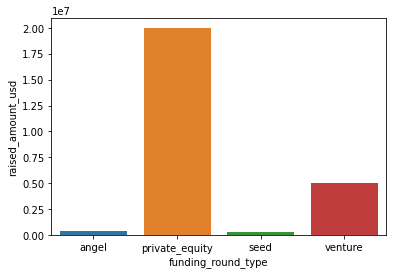

In [150]:
sns.barplot(x=investment_type.index,y=investment_type['raised_amount_usd'])
plt.show()

------------------------------------------------------------
Plot showing the top 9 countries against the total amount of Venture investments 

In [151]:
top9_plot

,raised_amount_usd,english_speaking
country_code,,
USA,4.225108e+11,True
CHN,3.983542e+10,False
GBR,2.024563e+10,True
IND,1.439186e+10,True
CAN,9.583332e+09,True
FRA,7.259537e+09,False
ISR,6.907515e+09,True
DEU,6.346960e+09,False
JPN,3.363677e+09,False


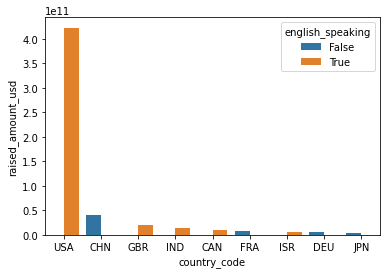

In [152]:
sns.barplot(x=top9_plot.index, y=top9_plot['raised_amount_usd'],hue=top9_plot['english_speaking'])
plt.show()

-------------------------------------------------
Plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart

In [153]:
sect_plot = master_frame_4.pivot_table(index='country_code',columns='main_sector',values='raised_amount_usd',aggfunc=lambda x: int(len(x)))

In [154]:
sect_plot = sect_plot.astype(int)
sect_plot

main_sector,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
country_code,,,,,,,,,
GBR,16,7,130,56,24,42,73,147,133
IND,13,2,20,33,19,21,52,110,60
USA,167,86,2350,591,909,799,1583,2950,2714


We normalize each row in order to plot heatmap with respect to each row, this will help understand the results better

In [155]:
sect_plot_norm = sect_plot.divide(sect_plot.max(axis=1),axis=0)

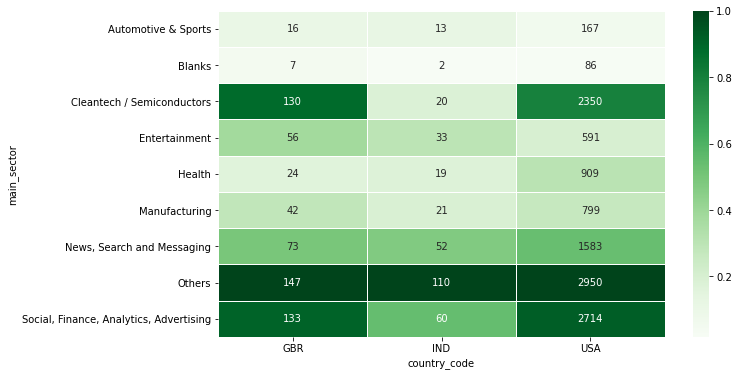

In [156]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=sect_plot_norm.transpose() , annot=sect_plot.transpose(), fmt='d', linewidths=.5, cmap='Greens')
plt.show()